In [77]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# ORL FACE 데이터 ( 얼굴인식 데이터 )

In [78]:
faces_all = fetch_olivetti_faces()   #sklearn 에 저장되어 있음
# 40명의 얼굴이 저장되어 있는 데이터.

In [79]:
X = faces_all.data# 실제데이터
y = faces_all.target# 타겟데이터

In [80]:
print(X.shape) # 400장의 사진이 있다. # 샘플 : 400개, 디멘션 : 4096
print(y)# 한사람당 10장씩 사진이 있다. => 0~39 가 나온다.      =======> 40명 x 10장 = 400장 사진 
# 얼굴 사진 하나가 64bit 여서 총 4096 차원이 된 것이다.

(400, 4096)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32

In [48]:
#plt.imshow(X[0], cmap='gray') # 영상데이터..
# 영상은 1차원이 아니기 때문에, 위 코드는 오류가 난다.
#print(X[0]) => 픽셀의 차원으로 나온다..

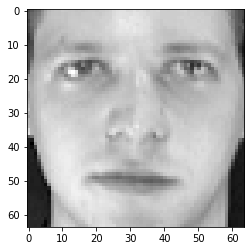

In [81]:



# 따라서, 64x64 로 reshape 해서 영상을 해야한다.
plt.imshow(X[0].reshape(64,64), cmap = 'gray')

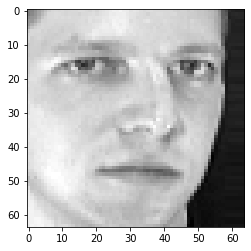

In [82]:
plt.imshow(X[1].reshape(64,64), cmap = 'gray')

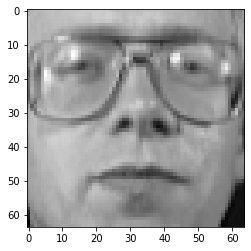

In [83]:
plt.imshow(X[11].reshape(64,64), cmap = 'gray')

In [84]:
# X를 X_train, X_test 와 y를 Y_train, Y_test로 분류를 해보아라.
# test_size = 0.3 의미 : 100개의 데이터 중 test는 30개하고 train은 70개한다. => 
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape) # 280 = 400 * 0.7
print(X_test.shape) # 120 = 400 * 0.3 
print(Y_train.shape)
print(Y_test.shape)
# 어제까지만 해도 train set과 test set을 구분하지 않았다.
# 오늘은 성능평가를 해야해서, train set을 중점적으로 봐야한다.

(280, 4096)
(120, 4096)
(280,)
(120,)


# PCA 란?
https://datascienceschool.net/view-notebook/f10aad8a34a4489697933f77c5d58e3a/


https://datascienceschool.net/view-notebook/f10aad8a34a4489697933f77c5d58e3a/
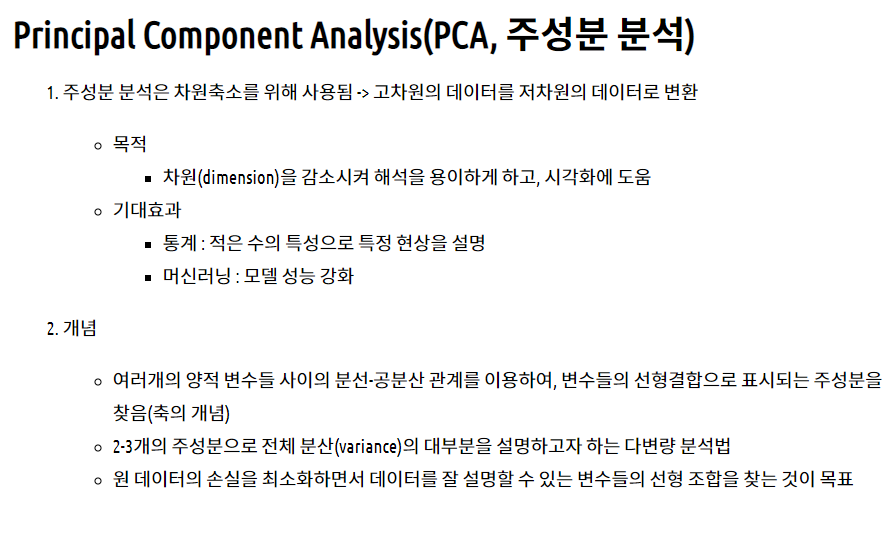

In [85]:
log_reg = LogisticRegression()

log_reg.fit(X_train, Y_train)  # 디멘션이 4096이라 학습하는데 오래걸려!

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
# 학습에 사용하지 않았던 데이터(X_test)를 가지고 예측을 해야 한다.
log_reg.predict(X_test) == Y_test

# 40명의 얼굴을 분류하는 알고리즘의 성능이 95%정도 나온다는 이야기
print(np.mean(log_reg.predict(X_test) == Y_test))

###여기서 잠깐!!!! 할 때 마다 값이 다르게 나오고 있어
### 이유 : train_test_split이 랜덤하게 섞어서.
## ex) 학습데이터들을 쉬운것들로만 몰려있고 테스트셋은 어려운것들만 몰렸으면, 성능이 낮게 나온다.
### 당황해하지마.

0.9


In [87]:
# 전체 데이터를 30개의 차원으로 줄이겠다. (4096차원 => 30차원)
# 사용하고자 하는 모듈은 PCA이다.
pca = PCA(n_components=100) # 선언만 한 것일뿐, 학습한 것은 아니다.
# 왜 500은 안될까?? => 200개 이후로부터 베리언스가 없어서(베리언스가 0이어서, 축을 계산할 수 없어서)
#따라서, 통계학적으로 의미있는 데이터는 200개까지라는 것이다.




# 중심되지 않는 데이터는 학습하지 않겠다( 그래서 Y_train은 안쓰는 거)
# 가장 큰 '주'축을 찾아줘!
pca.fit(X_train) # 학습을 하겠다! (sklearn 에서 학습은 무조건 'fit')
print(X_train.shape)   #'주'축을 찾았다.








lowX = pca.transform(X_train) # 원래 좌표 체계에서, 바뀐 값(PCA 좌표체계)으로 변환시키는 것..
print(lowX.shape) # 4096차원이 30차원으로 줄어들었다.


(280, 4096)
(280, 100)


In [88]:
log_reg.fit(lowX, Y_train) # 데이터가 줄어들었기 때문에, 빨리 나온다.

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
# 이대로하면 오류가 뜬다. train set이 4096=>30으로 줄였으니, 
# test set도 그에 걸맞게 줄여야지.
# log_reg.predict(X_test) 


In [90]:
# 30 으로 줄였는데.. 왜 나는 결과가 올랐냐..ㅋㅋ
# 원래는 더 줄어져야 하는데.. 상황에 따라서, 올라갈 수도 있다는 것
# 근데 '5'로 드라마틱하게 차원을 확 줄였더니 56% 대에서 확 줄어들었다.
lowX_test = pca.transform(X_test)
np.mean(log_reg.predict(lowX_test)==Y_test) 

0.9333333333333333

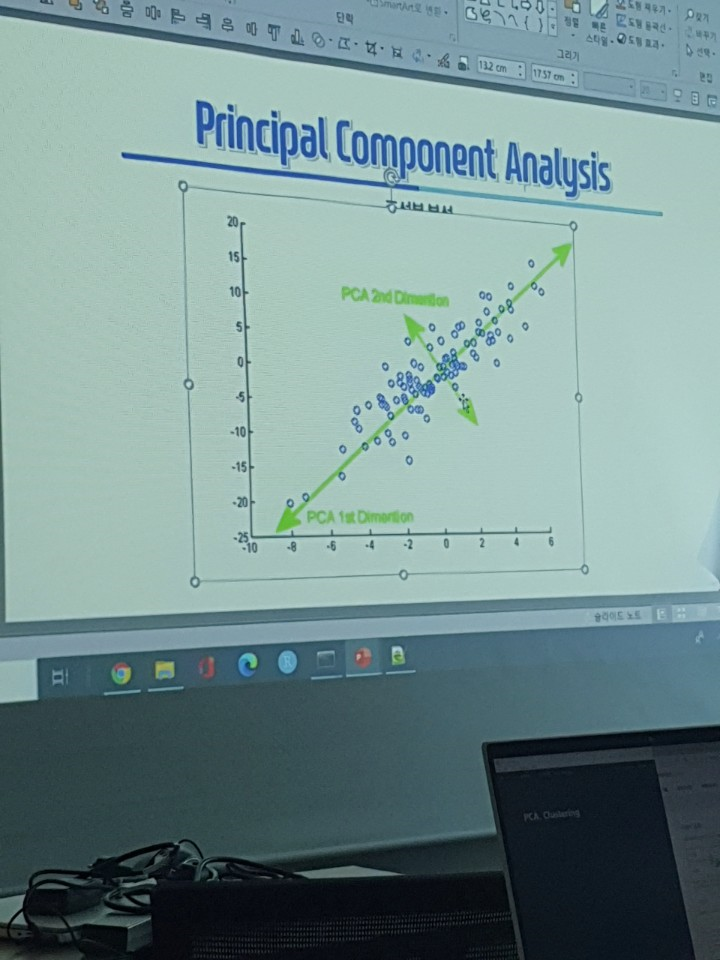

In [91]:
##전체 4096개 중 의미있는 100개를 뽑아서 보았더니, 
# 1번째 축에서 가면갈수록 베리언스가 점점 줄어들어 간다는 것을 확인 할 수 있다.
print(pca.singular_values_) # 베리언스(분산)를 보여주는 코드

# ===========================================================
# ASK!!! 내가 이렇게 생각했는데.. 이렇게 생각하는게 맞나??
# 베리언스는 '분산'을 의미 (분포가 넓은 곳!!!)
# 첫번째 주축(분산이 가장 넓은 곳) / 두번쨰 주축 (분산이 두번쨰로 넓은 곳)
# 세번째 주축 (분산이 세번쨰로 넓은 곳) / 100번째 주축 (분산이 100번쨰로 넓은 곳)
# =============================================================


# 첫번째    두번쨰     세번쨰     네번째..
#70.666     55.60516   42.15412   33.186928  28.547594  26.899906

[70.666     55.60516   42.15412   33.186928  28.547594  26.899906
 23.585491  21.623163  20.428183  19.125437  18.860495  18.149733
 16.697584  16.36766   15.930574  14.802428  14.538149  13.629556
 13.087537  12.636949  12.257083  11.846666  11.758296  11.474015
 11.033385  10.923096  10.522747  10.401904  10.166835   9.4633
  9.403028   9.186485   9.081808   8.816343   8.551634   8.437143
  8.306926   8.029987   7.9368997  7.9014354  7.7837157  7.5984955
  7.4528985  7.4178066  7.3557096  7.279282   7.126029   7.0483336
  6.841724   6.8023124  6.7207646  6.6439714  6.519036   6.458536
  6.4211826  6.348485   6.218331   6.1306114  6.076777   6.050833
  5.9524655  5.9102726  5.8052344  5.7769217  5.718897   5.6964445
  5.660837   5.5730343  5.5251293  5.426957   5.367338   5.314636
  5.2259088  5.183274   5.140924   5.0877366  5.046312   5.017064
  4.970292   4.8928843  4.867625   4.8369055  4.8064947  4.73602
  4.7125306  4.6946335  4.6371536  4.5798564  4.5501094  4.523143
  4.457497

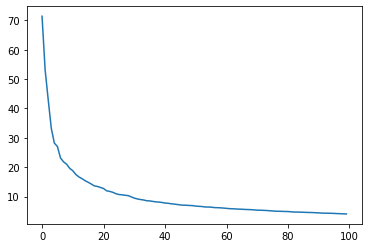

In [61]:
# 베리언스가 기하급수적으로 쭉쭉쭉 떨어진다.
# 그래프를 해석하면... 0~20의 베리언스만 가지고, 20~100배리언스는 버리겠다.
plt.plot(pca.singular_values_) # 각 축의 베리언스


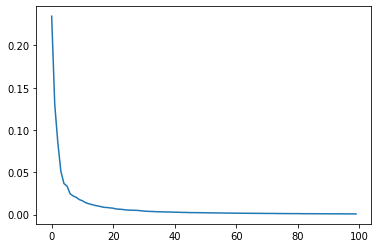

In [62]:
plt.plot(pca.explained_variance_ratio_) # 베리언스를 전체 베리언스 중에 베리언스가 어느 비중을 차지하는지 보여준다
# 1번째 축은 전체 베리언스 중에서 25% 정도 차지한다라는 의미

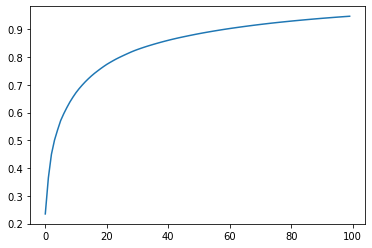

In [63]:
# 데이터를 누적해서 본다.

cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs)

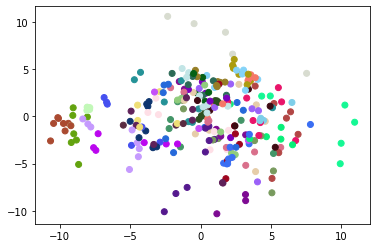

In [92]:
# 각각의 사람을 색깔별로 구분한다
# 같은 색깔끼리 여럿이 분포되어 있는것...이건 같은 사람들끼리 묶여있는 것


col = np.random.rand(40,3)# ASK!! => '3'은 랜덤 색상 값을 의미함
colors = [col[i] for i in Y_train]
plt.scatter(lowX[:,0], lowX[:,1], c=colors)

# K - Means Clustering   : 비지도 학습

https://github.com/jieunin1213/CSLEE_real/blob/master/(0707)%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20-Deep%20dive%20_%20%EC%A7%80%EC%9D%80_%EB%B3%B5%EC%8A%B5_%EC%B5%9C%EC%A2%85_%EA%B9%94%EB%81%94.ipynb

In [93]:
samples = 100

#print([samples,2])   =>  [100, 2]
# np.random.normal(0, 1, size=[samples,2]) => 0은 평균 / 1은 표준편차
x_data0 = np.random.normal(0, 1, size=[samples,2])
x_data1 = np.random.normal(2, 3, size=[samples,2])
#print(x_data0)

#주어진 데이터
x_data = np.vstack([x_data0, x_data1]) #vstack : 밑으로 쌓아라
#print(x_data)
#print(x_data.shape)

In [94]:
#       깃발을 랜덤하게 두개 꼽겠다.
model = KMeans(n_clusters=2, init = 'random', max_iter = 6).fit(x_data)
# sklearn은 항상 학습하는 것이 fit 이다.
# max_iter : 최적화를 위한 반복 횟수(iteration number)


#KMeans 는 센터 값을 정해준다... 지금 하고 있는 것은 쉬운 것이라서, 컴터가 금방 찾아준다.
print(model.cluster_centers_) 

#[[ 0.00647966 -0.17572491]   => 첫번째 센터 (0.006, -0.175)
# [ 4.88841868  5.06692776]]  => 두번째 센터 (4.888, 5.066)

[[4.03276484 3.30219498]
 [0.17603495 0.16306123]]


In [ ]:
# '(0708)day3_K_Means vs 일반 (비교) ' 파일 참조

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1]


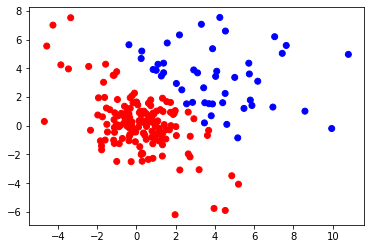

In [97]:
d = ['blue', 'red']
print(model.labels_)
colors = [  d[i] for i in model.labels_]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

## 마지막 사진의 사람의 숫자는 중구난방

## 이 뜻은 이 사람의 사진들이 조금씩 달랐다는 것
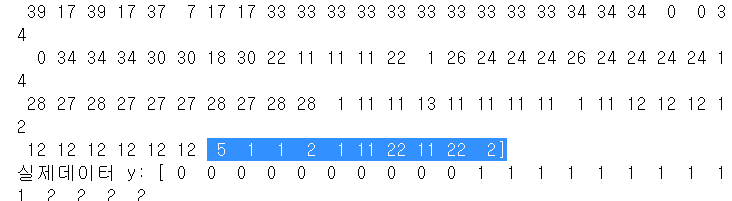



In [99]:
# 40개의 깃발을 꼽자.
model = KMeans(n_clusters=40, init = 'random', max_iter = 6).fit(X)

print('model.labels_:',model.labels_) # 사진들이 얼마나 잘 분류가 되어 있는지 확인하자.
# 같은 숫자끼리 묶여 있는 곳들이잘 분류가 되었다는 의미

print('실제데이터 y:',y)

model.labels_: [25 13 25 12 15 12  5 25  5  7 11 11 11 11 11 11 28 11 11 11 14 31 31 10
 10 10 35 10  7  7 17 26 10 15 15 29 29 17 26 15 17 14 14 17 12 12 17 12
 12 35 15 15 15 16 16 16 16 16 16 16  6  6  5  6  6  5  6  6  5  8  3 13
 15 13 15 15 13 15  5 13 18 14 18 18 18 17 17 18 18 18 31  7 31 31  7  7
  7  7 12  3 37 37 37 37 37 37 37 37 37 37  7 33 17 18 33 29 33  7  7  7
 17 31 29 17 29 15 29 29 15 29 21 21 21 21 21 21 21 21 21 21 26 26 26 26
 26 26 26 26 26 26 32 25 25  6  6 32  3 29  9 25 33 33 33 38 18 12 12 25
 12 12  3  3  5  3  3  5  3  5  3  5 24 24 24 37 37 24 37 37 37 24 27 27
 27 14 29 14 29 29 29 27 14 36 36 36 14 14 36 36 14 36 30 30 30 30 30 30
 30 30 30 30 15 15 18 17 31 17 18 15 29 29  9  9 23 23  9 23  9  9 23 23
 31 31 31 26 17 31 31 17 31 31 33 33 33 38 38 33 15 38 33 31 39 39 39 39
 39 39 39 39 39 39 19 38 19 19 38 19 38 19 38 19 30 30 30 36 34 36 36 34
 30 30 14 14 14 14 14 14 14 14 14 14  4 20 20 20 20  4 14  4  4 20 37 24
 24 37 39 37 26 37 37 37  0  0  0  0

# 분꽃으로 PCA /  K-means

- https://bcho.tistory.com/1209
- https://m.blog.naver.com/pmw9440/221861689683

In [100]:
iris = datasets.load_iris()


X= iris.data

Y= iris.target

#print(x)
#print(y)

In [169]:
# 1. PCA 적용해보기

In [101]:
#ASK!!!!!
pca = PCA(n_components=3) #PCA 객체 생성 (주성분 갯수 3개 생성 = '주축'이 3개라는 뜻!! 3차원 이니깐!!)
pca.fit(X)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [104]:
low = pca.transform(X) # low demension으로 바꾸었다.

In [105]:
model = KMeans(n_clusters=3, init="random", max_iter=6).fit(low) # 3개의 군집

In [106]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

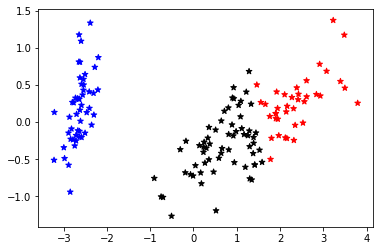

In [107]:

col = ['red','blue','black']
colors = [  col[i] for i in model.labels_]
plt.scatter(low[:,0], low[:,1], color=colors, marker='*')

#col = ['black','blue','red']
#colors = [  col[i] for i in model.labels_]
#plt.scatter(low[:,0], low[:,1], color=colors, marker='^')

# #pca = PCA(n_components=4) 

# PCA 객체 생성 (주성분 갯수 4개 생성)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 1 0 1 1 1 1 3 1 1 1 0
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0
 1 0]


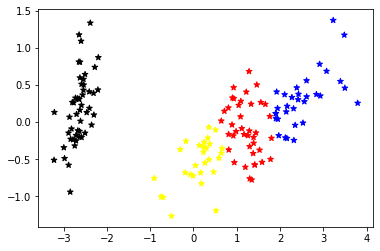

In [109]:
pca = PCA(n_components=4) #PCA 객체 생성 (주성분 갯수 4개 생성   = 주 축이 4개 생성)
pca.fit(X)
pca.explained_variance_ratio_

low = pca.transform(X)
model = KMeans(n_clusters=4, init="random", max_iter=6).fit(low)



print(model.labels_)


# 빨간색은 0번지.. '0'은 정확하게 0끼리 모여있음.. 
# 따라서, 빨간색들은 하나의 축만 가지더라도 어디에 군집되어있는지 알 수 있음.

col = ['red','blue','black','yellow']
colors = [  col[i] for i in model.labels_]
plt.scatter(low[:,0], low[:,1], color=colors, marker='*')

In [197]:
print(low.shape)

(150, 4)


#  의사결정 트리   : 비선형분포 문제 풀기

## - CART 알고리즘
   1.지니불순도
   - 데이터 구성에 대한 불순한 정도를 측정 (즉, 혼합 정도를 측정)
   - 트리는 불순도가 낮는 방향으로 구성
   - 불순도가 낮은 방향으로 기준 잡는게 중요 (지니계수 기준)
   - 지니계수가 0.0인 것은 데이터가 1개 뿐이라는 뜻

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

tree = DecisionTreeClassifier(max_depth=5) # 그래프의 깊이를 보여준다.

iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names,  class_names=iris.target_names, rounded=True, filled=True, impurity=True)


## 깊이가 5일때 지니계수가 0.0이 되어서, 완전히 분류가 끝난다.

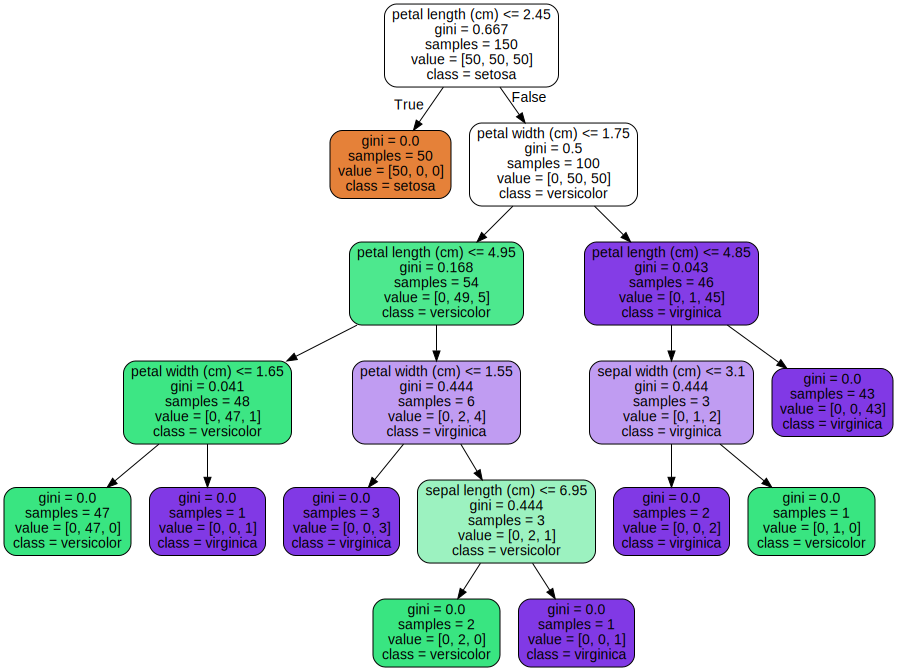

In [34]:
import pydot
graph = pydot.graph_from_dot_file("iris.dot")[0]
import graphviz
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 데이터의 dimension이 크면 tree의 depth가 엄청 깊겠지?
# 이를 위해서 PCA를 사용하자! => 이미지 데이터 같은 것을 차원 줄이기!!

# 얼굴 데이터로 tree 를 만들어 봅시다

In [112]:
# low X
faces_all = fetch_olivetti_faces()   #sklearn 에 저장되어 있음
# 40명의 얼굴이 저장되어 있는 데이터.

# 얼굴데이터  tree로 해봅시다.
X = faces_all.data
y = faces_all.target


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)


pca = PCA(n_components=100)   # 4096 -> 100
pca.fit(X_train)

print(X_train.shape)

lowX = pca.transform(X_train)
lowX_test = pca.transform(X_test)


# 얼굴데이터  tree로 해봅시다.
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(lowX, Y_train)


print('학습데이터에 대한 인식률:',np.mean(tree.predict(lowX) == Y_train))
# test 데이터를 할때는 는 매우 안좋게 나온다. depth를 아무리 깊이하여도...
print('테스터데이터에 대한 인식률:',np.mean(tree.predict(lowX_test) == Y_test)  )  


(200, 4096)
학습데이터에 대한 인식률: 1.0
테스터데이터에 대한 인식률: 0.435


# 얼굴인식이 제대로 되었는지 다시 확인해보자

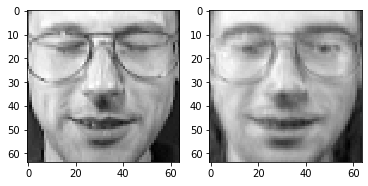

In [116]:
# low X
faces_all = fetch_olivetti_faces()   #sklearn 에 저장되어 있음
# 40명의 얼굴이 저장되어 있는 데이터.

# 얼굴데이터  tree로 해봅시다.
X = faces_all.data
y = faces_all.target


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)


pca = PCA(n_components=50)   # 4096 -> 50
pca.fit(X_train)

lowX = pca.transform(X_train)

recon = pca.inverse_transform(lowX)

plt.subplot(121) # 121
plt.imshow( X_train[123].reshape(64,64), cmap='gray')
plt.subplot(122) # 122
plt.imshow( recon[123].reshape(64,64), cmap='gray')

# 비선형 문제 풀어보기...

0.758


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


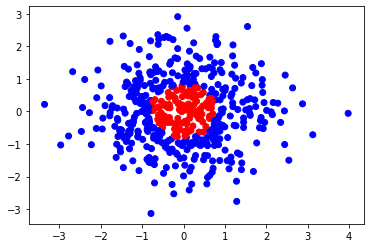

In [185]:
samples = 500
x_data = np.random.normal(0, 1, size=[samples,2])
# 파란색의 한 점이, 원점(빨간색)으로부터 거리 = d 


d = np.sqrt([x[0]**2+x[1]**2  for x in x_data ]) 




y_data = np.array([0  if   i < 0.8   else   1 for i  in d   ]).reshape(samples, 1)
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

print("=======================================")

# 성능구하기 문제
log_reg = LogisticRegression()

log_reg.fit(x_data, y_data)
print(log_reg.score(x_data , y_data)) # np.mean(log_reg.predict(x_data) == y_data)


# 성능이 71%이니깐 좋아보이죠?? 그러나 사실 좋은게 아니에요!
# why?? => 밑에 줄

In [187]:
log_reg.predict(x_data)
# 너 무슨색이야? => 나 '파란색이야'  / 죄다 1이 나온다..
# 즉, 골랐을 때 71% 는 파란색이 나오고... 29%는 빨간색이 나온다는 것.
# 따라서, 확률값만 가지고.. 이게 성능이 좋다 안좋다 이렇게 판별하면 안된다


# 시각화 한번 해 볼까요??

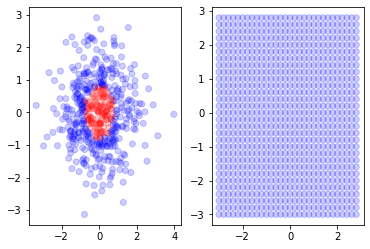

In [188]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)


xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = log_reg.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

# SVM   => 비선형 문제 해결
- support vector machine
- 마진을 최대화 하는 hyper plane을 찾는 알고리즘
- 비선형 커널을 사용해 비선형 문제를 풀 수 있음.


# 비선형이란? 
- 선형(y=wx+b)가 아닌 비선형 데이터에 대한 모형
- y = w0+w1x + w2x2


In [126]:
from sklearn.svm import SVC   
model = SVC(kernel='poly', degree = 2).fit(x_data , y_data)     # degree = 1 이면 선형이 된다.... 2일때는 제곱이니깐 비선형이고..

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
model.predict(x_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

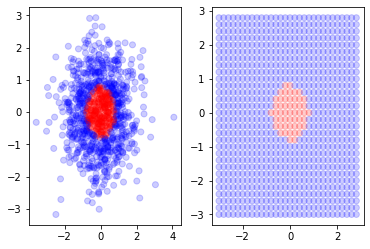

In [129]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


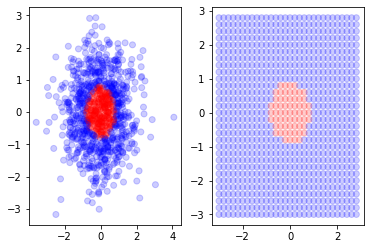

In [145]:
from sklearn.svm import SVC   
model = SVC(kernel='poly', degree = 4).fit(x_data , y_data)    
# poly 뿐만 아니라 ' rbf' 라는 kernel도 있다. = > 이거는 태극기 같은거 에 한번 써봐 ㅋㅋ..

model.predict(x_data)

plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

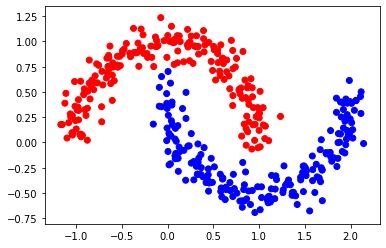

In [146]:
from sklearn.datasets import make_moons
x_data, y_data= make_moons(n_samples=400, noise=0.1, random_state=0)

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)


In [147]:
model = SVC(kernel='rbf').fit(x_data, y_data) 

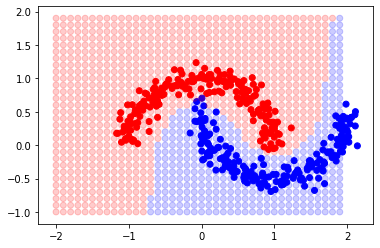

In [148]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

In [167]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) # polynomialfeatures : 기존의 차원들을 곱해서, 새로운 차원들을 만들겠다.

poly.fit([[1,2]])
print(poly.transform([[1,2]])) # 1 1,2, 1^2 , 1*2, 2^2

[[1. 1. 2. 1. 2. 4.]]


In [168]:
poly.fit(x_data)
print(x_data.shape)

(200, 2)


In [169]:
X2 = poly.transform(x_data)
print(X2.shape)

(200, 6)


In [170]:
log_reg = LogisticRegression()
log_reg.fit(X2, y_data)  # 6차원으로 확장된 데이터(X2)를 학습시켜라!

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

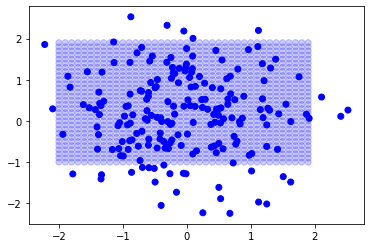

In [171]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()] # 여기서 grid 는 2차원이고
grid = poly.transform(grid) # transform(grid) 는 6차원이 된다.
p = log_reg.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

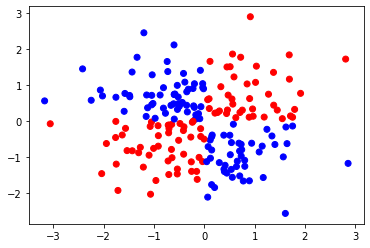

In [178]:

# 가장 전통적인 비선형 문제...! 선형분류가 어려운 것! XOR 

x_data = np.random.randn(200, 2)
y_data  = np.logical_xor(x_data[:, 0] > 0, x_data[:, 1] > 0)*2-1


colors = ["red"  if   i  == -1  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

In [177]:
x = [1,2]   #-> 1, 1, 2, 1^2, 
x2 = [1,x[0],x[1],x[0]**2, x[0]*x[1], x[1]**2]  # PolynomialFeatures 을 의미

print(x2)

[1, 1, 2, 1, 2, 4]
